### trying new preprocessing techniques:

1. Skull Stripping 
2. Registration to MNI space
3. Intensity Normalization (Z Score)

In [1]:
import os
import nibabel as nib
import numpy as np
from nilearn import image as nli
from nilearn.masking import compute_brain_mask

In [2]:
def preprocess_subject(subject_path, output_dir, mni_template_path):
    # Step 1: Load image
    img = nib.load(subject_path)
    img_data = img.get_fdata()
    affine = img.affine
    header = img.header

    # Step 2: Skull Stripping using brain mask
    print(f"[INFO] Skull stripping: {subject_path}")
    brain_mask = compute_brain_mask(img)
    brain_data = img_data * brain_mask.get_fdata()
    skull_stripped_img = nib.Nifti1Image(brain_data, affine, header)

    # Step 3: Register to MNI template
    print("[INFO] Affine registration to MNI using nilearn")
    mni_template = nib.load(mni_template_path)
    registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')

    # Step 4: Intensity Normalization (Z-score)
    print("[INFO] Applying Z-score intensity normalization")
    data = registered_img.get_fdata()
    norm_data = (data - np.mean(data)) / np.std(data)
    norm_img = nib.Nifti1Image(norm_data, registered_img.affine, registered_img.header)

    # Save final file
    base_name = os.path.basename(subject_path).replace('.nii.gz', '_normalized')
    final_path = os.path.join(output_dir, f"{base_name}.nii.gz")
    nib.save(norm_img, final_path)

    print(f"[SUCCESS] Saved: {final_path}")
    return final_path


data_dir = "NIFTI"
output_dir = "preprocessing"
mni_template_path = "mni_icbm152_t1_tal_nlin_sym_09c.nii"

os.makedirs(output_dir, exist_ok=True)

for subject_file in [f for f in os.listdir(data_dir) if f.endswith(".nii.gz")]:
    subject_path = os.path.join(data_dir, subject_file)
    print(f"\nProcessing: {subject_file}")
    try:
        preprocess_subject(subject_path, output_dir, mni_template_path)
    except Exception as e:
        print(f"[ERROR] Failed to process {subject_file}: {e}")


Processing: 002_S_0413.nii.gz
[INFO] Skull stripping: NIFTI\002_S_0413.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\002_S_0413_normalized.nii.gz

Processing: 002_S_10814.nii.gz
[INFO] Skull stripping: NIFTI\002_S_10814.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\002_S_10814_normalized.nii.gz

Processing: 002_S_1155.nii.gz
[INFO] Skull stripping: NIFTI\002_S_1155.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\002_S_1155_normalized.nii.gz

Processing: 002_S_1280.nii.gz
[INFO] Skull stripping: NIFTI\002_S_1280.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\002_S_1280_normalized.nii.gz

Processing: 002_S_4213.nii.gz
[INFO] Skull stripping: NIFTI\002_S_4213.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\002_S_4213_normalized.nii.gz

Processing: 002_S_5178.nii.gz
[INFO] Skull stripping: NIFTI\002_S_5178.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\002_S_5178_normalized.nii.gz

Processing: 002_S_6007.nii.gz
[INFO] Skull stripping: NIFTI\002_S_6007.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\002_S_6007_normalized.nii.gz

Processing: 002_S_6053.nii.gz
[INFO] Skull stripping: NIFTI\002_S_6053.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\002_S_6053_normalized.nii.gz

Processing: 002_S_6103.nii.gz
[INFO] Skull stripping: NIFTI\002_S_6103.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\002_S_6103_normalized.nii.gz

Processing: 002_S_6404.nii.gz
[INFO] Skull stripping: NIFTI\002_S_6404.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\002_S_6404_normalized.nii.gz

Processing: 003_S_10042.nii.gz
[INFO] Skull stripping: NIFTI\003_S_10042.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_10042_normalized.nii.gz

Processing: 003_S_10073.nii.gz
[INFO] Skull stripping: NIFTI\003_S_10073.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_10073_normalized.nii.gz

Processing: 003_S_10082.nii.gz
[INFO] Skull stripping: NIFTI\003_S_10082.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_10082_normalized.nii.gz

Processing: 003_S_10158.nii.gz
[INFO] Skull stripping: NIFTI\003_S_10158.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_10158_normalized.nii.gz

Processing: 003_S_10426.nii.gz
[INFO] Skull stripping: NIFTI\003_S_10426.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_10426_normalized.nii.gz

Processing: 003_S_10593.nii.gz
[INFO] Skull stripping: NIFTI\003_S_10593.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_10593_normalized.nii.gz

Processing: 003_S_10622.nii.gz
[INFO] Skull stripping: NIFTI\003_S_10622.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_10622_normalized.nii.gz

Processing: 003_S_4288.nii.gz
[INFO] Skull stripping: NIFTI\003_S_4288.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_4288_normalized.nii.gz

Processing: 003_S_4350.nii.gz
[INFO] Skull stripping: NIFTI\003_S_4350.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_4350_normalized.nii.gz

Processing: 003_S_4441.nii.gz
[INFO] Skull stripping: NIFTI\003_S_4441.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_4441_normalized.nii.gz

Processing: 003_S_4872.nii.gz
[INFO] Skull stripping: NIFTI\003_S_4872.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_4872_normalized.nii.gz

Processing: 003_S_4900.nii.gz
[INFO] Skull stripping: NIFTI\003_S_4900.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_4900_normalized.nii.gz

Processing: 003_S_6014.nii.gz
[INFO] Skull stripping: NIFTI\003_S_6014.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_6014_normalized.nii.gz

Processing: 003_S_6256.nii.gz
[INFO] Skull stripping: NIFTI\003_S_6256.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_6256_normalized.nii.gz

Processing: 003_S_6258.nii.gz
[INFO] Skull stripping: NIFTI\003_S_6258.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_6258_normalized.nii.gz

Processing: 003_S_6259.nii.gz
[INFO] Skull stripping: NIFTI\003_S_6259.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_6259_normalized.nii.gz

Processing: 003_S_6268.nii.gz
[INFO] Skull stripping: NIFTI\003_S_6268.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_6268_normalized.nii.gz

Processing: 003_S_6915.nii.gz
[INFO] Skull stripping: NIFTI\003_S_6915.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_6915_normalized.nii.gz

Processing: 003_S_6996.nii.gz
[INFO] Skull stripping: NIFTI\003_S_6996.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_6996_normalized.nii.gz

Processing: 003_S_7010.nii.gz
[INFO] Skull stripping: NIFTI\003_S_7010.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\003_S_7010_normalized.nii.gz

Processing: 005_S_10100.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10100.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10100_normalized.nii.gz

Processing: 005_S_10101.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10101.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10101_normalized.nii.gz

Processing: 005_S_10237.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10237.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10237_normalized.nii.gz

Processing: 005_S_10240.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10240.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10240_normalized.nii.gz

Processing: 005_S_10288.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10288.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10288_normalized.nii.gz

Processing: 005_S_10300.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10300.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10300_normalized.nii.gz

Processing: 005_S_10301.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10301.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10301_normalized.nii.gz

Processing: 005_S_10302.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10302.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10302_normalized.nii.gz

Processing: 005_S_10421.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10421.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10421_normalized.nii.gz

Processing: 005_S_10446.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10446.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10446_normalized.nii.gz

Processing: 005_S_10646.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10646.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10646_normalized.nii.gz

Processing: 005_S_10658.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10658.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10658_normalized.nii.gz

Processing: 005_S_10805.nii.gz
[INFO] Skull stripping: NIFTI\005_S_10805.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_10805_normalized.nii.gz

Processing: 005_S_6393.nii.gz
[INFO] Skull stripping: NIFTI\005_S_6393.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_6393_normalized.nii.gz

Processing: 005_S_6427.nii.gz
[INFO] Skull stripping: NIFTI\005_S_6427.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\005_S_6427_normalized.nii.gz

Processing: 006_S_10504.nii.gz
[INFO] Skull stripping: NIFTI\006_S_10504.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\006_S_10504_normalized.nii.gz

Processing: 006_S_4713.nii.gz
[INFO] Skull stripping: NIFTI\006_S_4713.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\006_S_4713_normalized.nii.gz

Processing: 006_S_4713_series2.nii.gz
[INFO] Skull stripping: NIFTI\006_S_4713_series2.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\006_S_4713_series2_normalized.nii.gz

Processing: 006_S_6209.nii.gz
[INFO] Skull stripping: NIFTI\006_S_6209.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\006_S_6209_normalized.nii.gz

Processing: 006_S_6234.nii.gz
[INFO] Skull stripping: NIFTI\006_S_6234.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\006_S_6234_normalized.nii.gz

Processing: 006_S_6243.nii.gz
[INFO] Skull stripping: NIFTI\006_S_6243.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\006_S_6243_normalized.nii.gz

Processing: 006_S_6500.nii.gz
[INFO] Skull stripping: NIFTI\006_S_6500.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\006_S_6500_normalized.nii.gz

Processing: 006_S_6651.nii.gz
[INFO] Skull stripping: NIFTI\006_S_6651.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\006_S_6651_normalized.nii.gz

Processing: 006_S_6657.nii.gz
[INFO] Skull stripping: NIFTI\006_S_6657.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\006_S_6657_normalized.nii.gz

Processing: 006_S_6681.nii.gz
[INFO] Skull stripping: NIFTI\006_S_6681.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\006_S_6681_normalized.nii.gz

Processing: 007_S_10130.nii.gz
[INFO] Skull stripping: NIFTI\007_S_10130.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_10130_normalized.nii.gz

Processing: 007_S_10258.nii.gz
[INFO] Skull stripping: NIFTI\007_S_10258.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_10258_normalized.nii.gz

Processing: 007_S_10467.nii.gz
[INFO] Skull stripping: NIFTI\007_S_10467.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_10467_normalized.nii.gz

Processing: 007_S_1222.nii.gz
[INFO] Skull stripping: NIFTI\007_S_1222.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_1222_normalized.nii.gz

Processing: 007_S_2394.nii.gz
[INFO] Skull stripping: NIFTI\007_S_2394.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_2394_normalized.nii.gz

Processing: 007_S_4272.nii.gz
[INFO] Skull stripping: NIFTI\007_S_4272.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_4272_normalized.nii.gz

Processing: 007_S_4488.nii.gz
[INFO] Skull stripping: NIFTI\007_S_4488.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_4488_normalized.nii.gz

Processing: 007_S_4637.nii.gz
[INFO] Skull stripping: NIFTI\007_S_4637.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_4637_normalized.nii.gz

Processing: 007_S_5265.nii.gz
[INFO] Skull stripping: NIFTI\007_S_5265.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_5265_normalized.nii.gz

Processing: 007_S_6323.nii.gz
[INFO] Skull stripping: NIFTI\007_S_6323.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_6323_normalized.nii.gz

Processing: 007_S_6455.nii.gz
[INFO] Skull stripping: NIFTI\007_S_6455.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_6455_normalized.nii.gz

Processing: 007_S_6515.nii.gz
[INFO] Skull stripping: NIFTI\007_S_6515.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\007_S_6515_normalized.nii.gz

Processing: 011_S_0021.nii.gz
[INFO] Skull stripping: NIFTI\011_S_0021.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_0021_normalized.nii.gz

Processing: 011_S_10041.nii.gz
[INFO] Skull stripping: NIFTI\011_S_10041.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_10041_normalized.nii.gz

Processing: 011_S_10045.nii.gz
[INFO] Skull stripping: NIFTI\011_S_10045.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_10045_normalized.nii.gz

Processing: 011_S_10261.nii.gz
[INFO] Skull stripping: NIFTI\011_S_10261.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_10261_normalized.nii.gz

Processing: 011_S_10278.nii.gz
[INFO] Skull stripping: NIFTI\011_S_10278.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_10278_normalized.nii.gz

Processing: 011_S_10359.nii.gz
[INFO] Skull stripping: NIFTI\011_S_10359.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_10359_normalized.nii.gz

Processing: 011_S_10371.nii.gz
[INFO] Skull stripping: NIFTI\011_S_10371.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_10371_normalized.nii.gz

Processing: 011_S_10384.nii.gz
[INFO] Skull stripping: NIFTI\011_S_10384.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_10384_normalized.nii.gz

Processing: 011_S_10483.nii.gz
[INFO] Skull stripping: NIFTI\011_S_10483.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_10483_normalized.nii.gz

Processing: 011_S_4105.nii.gz
[INFO] Skull stripping: NIFTI\011_S_4105.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_4105_normalized.nii.gz

Processing: 011_S_6367.nii.gz
[INFO] Skull stripping: NIFTI\011_S_6367.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_6367_normalized.nii.gz

Processing: 011_S_6418.nii.gz
[INFO] Skull stripping: NIFTI\011_S_6418.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_6418_normalized.nii.gz

Processing: 011_S_7089.nii.gz
[INFO] Skull stripping: NIFTI\011_S_7089.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_7089_normalized.nii.gz

Processing: 011_S_7112.nii.gz
[INFO] Skull stripping: NIFTI\011_S_7112.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\011_S_7112_normalized.nii.gz

Processing: 012_S_10244.nii.gz
[INFO] Skull stripping: NIFTI\012_S_10244.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\012_S_10244_normalized.nii.gz

Processing: 012_S_10277.nii.gz
[INFO] Skull stripping: NIFTI\012_S_10277.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\012_S_10277_normalized.nii.gz

Processing: 012_S_10287.nii.gz
[INFO] Skull stripping: NIFTI\012_S_10287.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\012_S_10287_normalized.nii.gz

Processing: 012_S_10312.nii.gz
[INFO] Skull stripping: NIFTI\012_S_10312.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\012_S_10312_normalized.nii.gz

Processing: 012_S_10454.nii.gz
[INFO] Skull stripping: NIFTI\012_S_10454.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\012_S_10454_normalized.nii.gz

Processing: 012_S_10701.nii.gz
[INFO] Skull stripping: NIFTI\012_S_10701.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\012_S_10701_normalized.nii.gz

Processing: 012_S_10702.nii.gz
[INFO] Skull stripping: NIFTI\012_S_10702.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\012_S_10702_normalized.nii.gz

Processing: 014_S_10157.nii.gz
[INFO] Skull stripping: NIFTI\014_S_10157.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_10157_normalized.nii.gz

Processing: 014_S_10180.nii.gz
[INFO] Skull stripping: NIFTI\014_S_10180.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_10180_normalized.nii.gz

Processing: 014_S_10317.nii.gz
[INFO] Skull stripping: NIFTI\014_S_10317.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_10317_normalized.nii.gz

Processing: 014_S_10325.nii.gz
[INFO] Skull stripping: NIFTI\014_S_10325.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_10325_normalized.nii.gz

Processing: 014_S_10409.nii.gz
[INFO] Skull stripping: NIFTI\014_S_10409.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_10409_normalized.nii.gz

Processing: 014_S_10434.nii.gz
[INFO] Skull stripping: NIFTI\014_S_10434.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_10434_normalized.nii.gz

Processing: 014_S_10570.nii.gz
[INFO] Skull stripping: NIFTI\014_S_10570.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_10570_normalized.nii.gz

Processing: 014_S_10687.nii.gz
[INFO] Skull stripping: NIFTI\014_S_10687.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_10687_normalized.nii.gz

Processing: 014_S_10753.nii.gz
[INFO] Skull stripping: NIFTI\014_S_10753.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_10753_normalized.nii.gz

Processing: 014_S_4401.nii.gz
[INFO] Skull stripping: NIFTI\014_S_4401.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_4401_normalized.nii.gz

Processing: 014_S_4576.nii.gz
[INFO] Skull stripping: NIFTI\014_S_4576.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_4576_normalized.nii.gz

Processing: 014_S_6145.nii.gz
[INFO] Skull stripping: NIFTI\014_S_6145.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_6145_normalized.nii.gz

Processing: 014_S_6424.nii.gz
[INFO] Skull stripping: NIFTI\014_S_6424.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_6424_normalized.nii.gz

Processing: 014_S_6502.nii.gz
[INFO] Skull stripping: NIFTI\014_S_6502.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_6502_normalized.nii.gz

Processing: 014_S_6765.nii.gz
[INFO] Skull stripping: NIFTI\014_S_6765.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_6765_normalized.nii.gz

Processing: 014_S_6831.nii.gz
[INFO] Skull stripping: NIFTI\014_S_6831.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_6831_normalized.nii.gz

Processing: 014_S_6920.nii.gz
[INFO] Skull stripping: NIFTI\014_S_6920.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_6920_normalized.nii.gz

Processing: 014_S_6935.nii.gz
[INFO] Skull stripping: NIFTI\014_S_6935.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_6935_normalized.nii.gz

Processing: 014_S_6988.nii.gz
[INFO] Skull stripping: NIFTI\014_S_6988.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\014_S_6988_normalized.nii.gz

Processing: 016_S_10124.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10124.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10124_normalized.nii.gz

Processing: 016_S_10138.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10138.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10138_normalized.nii.gz

Processing: 016_S_10174.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10174.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10174_normalized.nii.gz

Processing: 016_S_10189.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10189.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10189_normalized.nii.gz

Processing: 016_S_10190.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10190.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10190_normalized.nii.gz

Processing: 016_S_10207.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10207.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10207_normalized.nii.gz

Processing: 016_S_10324.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10324.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10324_normalized.nii.gz

Processing: 016_S_10429.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10429.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10429_normalized.nii.gz

Processing: 016_S_10441.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10441.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10441_normalized.nii.gz

Processing: 016_S_10452.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10452.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10452_normalized.nii.gz

Processing: 016_S_10625.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10625.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10625_normalized.nii.gz

Processing: 016_S_10706.nii.gz
[INFO] Skull stripping: NIFTI\016_S_10706.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_10706_normalized.nii.gz

Processing: 016_S_6809.nii.gz
[INFO] Skull stripping: NIFTI\016_S_6809.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_6809_normalized.nii.gz

Processing: 016_S_6816.nii.gz
[INFO] Skull stripping: NIFTI\016_S_6816.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_6816_normalized.nii.gz

Processing: 016_S_6926.nii.gz
[INFO] Skull stripping: NIFTI\016_S_6926.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_6926_normalized.nii.gz

Processing: 016_S_6931.nii.gz
[INFO] Skull stripping: NIFTI\016_S_6931.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_6931_normalized.nii.gz

Processing: 016_S_6934.nii.gz
[INFO] Skull stripping: NIFTI\016_S_6934.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\016_S_6934_normalized.nii.gz

Processing: 018_S_10435.nii.gz
[INFO] Skull stripping: NIFTI\018_S_10435.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\018_S_10435_normalized.nii.gz

Processing: 018_S_2180.nii.gz
[INFO] Skull stripping: NIFTI\018_S_2180.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\018_S_2180_normalized.nii.gz

Processing: 018_S_4400.nii.gz
[INFO] Skull stripping: NIFTI\018_S_4400.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\018_S_4400_normalized.nii.gz

Processing: 022_S_10040.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10040.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10040_normalized.nii.gz

Processing: 022_S_10043.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10043.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10043_normalized.nii.gz

Processing: 022_S_10046.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10046.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10046_normalized.nii.gz

Processing: 022_S_10055.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10055.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10055_normalized.nii.gz

Processing: 022_S_10066.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10066.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10066_normalized.nii.gz

Processing: 022_S_10132.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10132.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10132_normalized.nii.gz

Processing: 022_S_10136.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10136.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10136_normalized.nii.gz

Processing: 022_S_10143.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10143.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10143_normalized.nii.gz

Processing: 022_S_10181.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10181.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10181_normalized.nii.gz

Processing: 022_S_10186.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10186.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10186_normalized.nii.gz

Processing: 022_S_10227.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10227.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10227_normalized.nii.gz

Processing: 022_S_10256.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10256.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10256_normalized.nii.gz

Processing: 022_S_10306.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10306.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10306_normalized.nii.gz

Processing: 022_S_10323.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10323.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10323_normalized.nii.gz

Processing: 022_S_10343.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10343.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10343_normalized.nii.gz

Processing: 022_S_10348.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10348.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10348_normalized.nii.gz

Processing: 022_S_10361.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10361.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10361_normalized.nii.gz

Processing: 022_S_10381.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10381.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10381_normalized.nii.gz

Processing: 022_S_10403.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10403.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10403_normalized.nii.gz

Processing: 022_S_10432.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10432.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10432_normalized.nii.gz

Processing: 022_S_10440.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10440.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10440_normalized.nii.gz

Processing: 022_S_10461.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10461.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10461_normalized.nii.gz

Processing: 022_S_10473.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10473.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10473_normalized.nii.gz

Processing: 022_S_10481.nii.gz
[INFO] Skull stripping: NIFTI\022_S_10481.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_10481_normalized.nii.gz

Processing: 022_S_6797.nii.gz
[INFO] Skull stripping: NIFTI\022_S_6797.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\022_S_6797_normalized.nii.gz

Processing: 023_S_10094.nii.gz
[INFO] Skull stripping: NIFTI\023_S_10094.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_10094_normalized.nii.gz

Processing: 023_S_10173.nii.gz
[INFO] Skull stripping: NIFTI\023_S_10173.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_10173_normalized.nii.gz

Processing: 023_S_10179.nii.gz
[INFO] Skull stripping: NIFTI\023_S_10179.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_10179_normalized.nii.gz

Processing: 023_S_10715.nii.gz
[INFO] Skull stripping: NIFTI\023_S_10715.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_10715_normalized.nii.gz

Processing: 023_S_10752.nii.gz
[INFO] Skull stripping: NIFTI\023_S_10752.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_10752_normalized.nii.gz

Processing: 023_S_4115.nii.gz
[INFO] Skull stripping: NIFTI\023_S_4115.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_4115_normalized.nii.gz

Processing: 023_S_4164.nii.gz
[INFO] Skull stripping: NIFTI\023_S_4164.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_4164_normalized.nii.gz

Processing: 023_S_4448.nii.gz
[INFO] Skull stripping: NIFTI\023_S_4448.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_4448_normalized.nii.gz

Processing: 023_S_6334.nii.gz
[INFO] Skull stripping: NIFTI\023_S_6334.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_6334_normalized.nii.gz

Processing: 023_S_6346.nii.gz
[INFO] Skull stripping: NIFTI\023_S_6346.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_6346_normalized.nii.gz

Processing: 023_S_6369.nii.gz
[INFO] Skull stripping: NIFTI\023_S_6369.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_6369_normalized.nii.gz

Processing: 023_S_6374.nii.gz
[INFO] Skull stripping: NIFTI\023_S_6374.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_6374_normalized.nii.gz

Processing: 023_S_6400.nii.gz
[INFO] Skull stripping: NIFTI\023_S_6400.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_6400_normalized.nii.gz

Processing: 023_S_6535.nii.gz
[INFO] Skull stripping: NIFTI\023_S_6535.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_6535_normalized.nii.gz

Processing: 023_S_6547.nii.gz
[INFO] Skull stripping: NIFTI\023_S_6547.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_6547_normalized.nii.gz

Processing: 023_S_6702.nii.gz
[INFO] Skull stripping: NIFTI\023_S_6702.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\023_S_6702_normalized.nii.gz

Processing: 024_S_10878.nii.gz
[INFO] Skull stripping: NIFTI\024_S_10878.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\024_S_10878_normalized.nii.gz

Processing: 024_S_4084.nii.gz
[INFO] Skull stripping: NIFTI\024_S_4084.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\024_S_4084_normalized.nii.gz

Processing: 024_S_6005.nii.gz
[INFO] Skull stripping: NIFTI\024_S_6005.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\024_S_6005_normalized.nii.gz

Processing: 024_S_6202.nii.gz
[INFO] Skull stripping: NIFTI\024_S_6202.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\024_S_6202_normalized.nii.gz

Processing: 024_S_7025.nii.gz
[INFO] Skull stripping: NIFTI\024_S_7025.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\024_S_7025_normalized.nii.gz

Processing: 031_S_10601.nii.gz
[INFO] Skull stripping: NIFTI\031_S_10601.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\031_S_10601_normalized.nii.gz

Processing: 031_S_10651.nii.gz
[INFO] Skull stripping: NIFTI\031_S_10651.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\031_S_10651_normalized.nii.gz

Processing: 031_S_10652.nii.gz
[INFO] Skull stripping: NIFTI\031_S_10652.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\031_S_10652_normalized.nii.gz

Processing: 031_S_10699.nii.gz
[INFO] Skull stripping: NIFTI\031_S_10699.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\031_S_10699_normalized.nii.gz

Processing: 031_S_10720.nii.gz
[INFO] Skull stripping: NIFTI\031_S_10720.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\031_S_10720_normalized.nii.gz

Processing: 031_S_10731.nii.gz
[INFO] Skull stripping: NIFTI\031_S_10731.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\031_S_10731_normalized.nii.gz

Processing: 032_S_10757.nii.gz
[INFO] Skull stripping: NIFTI\032_S_10757.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\032_S_10757_normalized.nii.gz

Processing: 032_S_6293.nii.gz
[INFO] Skull stripping: NIFTI\032_S_6293.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\032_S_6293_normalized.nii.gz

Processing: 032_S_6699.nii.gz
[INFO] Skull stripping: NIFTI\032_S_6699.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\032_S_6699_normalized.nii.gz

Processing: 032_S_6804.nii.gz
[INFO] Skull stripping: NIFTI\032_S_6804.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\032_S_6804_normalized.nii.gz

Processing: 033_S_10005.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10005.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10005_normalized.nii.gz

Processing: 033_S_10008.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10008.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10008_normalized.nii.gz

Processing: 033_S_10009.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10009.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10009_normalized.nii.gz

Processing: 033_S_10016.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10016.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10016_normalized.nii.gz

Processing: 033_S_10022.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10022.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10022_normalized.nii.gz

Processing: 033_S_10025.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10025.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10025_normalized.nii.gz

Processing: 033_S_10092.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10092.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10092_normalized.nii.gz

Processing: 033_S_10099.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10099.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10099_normalized.nii.gz

Processing: 033_S_10118.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10118.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10118_normalized.nii.gz

Processing: 033_S_10150.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10150.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10150_normalized.nii.gz

Processing: 033_S_10170.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10170.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10170_normalized.nii.gz

Processing: 033_S_10175.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10175.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10175_normalized.nii.gz

Processing: 033_S_10196.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10196.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10196_normalized.nii.gz

Processing: 033_S_10210.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10210.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10210_normalized.nii.gz

Processing: 033_S_10215.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10215.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10215_normalized.nii.gz

Processing: 033_S_10229.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10229.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10229_normalized.nii.gz

Processing: 033_S_10276.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10276.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10276_normalized.nii.gz

Processing: 033_S_10328.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10328.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10328_normalized.nii.gz

Processing: 033_S_10353.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10353.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10353_normalized.nii.gz

Processing: 033_S_10379.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10379.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10379_normalized.nii.gz

Processing: 033_S_10391.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10391.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10391_normalized.nii.gz

Processing: 033_S_10735.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10735.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10735_normalized.nii.gz

Processing: 033_S_10736.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10736.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10736_normalized.nii.gz

Processing: 033_S_10738.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10738.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10738_normalized.nii.gz

Processing: 033_S_10739.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10739.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10739_normalized.nii.gz

Processing: 033_S_10742.nii.gz
[INFO] Skull stripping: NIFTI\033_S_10742.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_10742_normalized.nii.gz

Processing: 033_S_5198.nii.gz
[INFO] Skull stripping: NIFTI\033_S_5198.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_5198_normalized.nii.gz

Processing: 033_S_6266.nii.gz
[INFO] Skull stripping: NIFTI\033_S_6266.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_6266_normalized.nii.gz

Processing: 033_S_6572.nii.gz
[INFO] Skull stripping: NIFTI\033_S_6572.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_6572_normalized.nii.gz

Processing: 033_S_6889.nii.gz
[INFO] Skull stripping: NIFTI\033_S_6889.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_6889_normalized.nii.gz

Processing: 033_S_6969.nii.gz
[INFO] Skull stripping: NIFTI\033_S_6969.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_6969_normalized.nii.gz

Processing: 033_S_7079.nii.gz
[INFO] Skull stripping: NIFTI\033_S_7079.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_7079_normalized.nii.gz

Processing: 033_S_7088.nii.gz
[INFO] Skull stripping: NIFTI\033_S_7088.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_7088_normalized.nii.gz

Processing: 033_S_7114.nii.gz
[INFO] Skull stripping: NIFTI\033_S_7114.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\033_S_7114_normalized.nii.gz

Processing: 035_S_10030.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10030.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10030_normalized.nii.gz

Processing: 035_S_10031.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10031.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10031_normalized.nii.gz

Processing: 035_S_10048.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10048.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10048_normalized.nii.gz

Processing: 035_S_10048_series2.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10048_series2.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10048_series2_normalized.nii.gz

Processing: 035_S_10052.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10052.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10052_normalized.nii.gz

Processing: 035_S_10053.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10053.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10053_normalized.nii.gz

Processing: 035_S_10067.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10067.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10067_normalized.nii.gz

Processing: 035_S_10068.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10068.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10068_normalized.nii.gz

Processing: 035_S_10093.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10093.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10093_normalized.nii.gz

Processing: 035_S_10096.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10096.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10096_normalized.nii.gz

Processing: 035_S_10193.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10193.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10193_normalized.nii.gz

Processing: 035_S_10241.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10241.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10241_normalized.nii.gz

Processing: 035_S_10274.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10274.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10274_normalized.nii.gz

Processing: 035_S_10340.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10340.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10340_normalized.nii.gz

Processing: 035_S_10364.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10364.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10364_normalized.nii.gz

Processing: 035_S_10382.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10382.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10382_normalized.nii.gz

Processing: 035_S_10455.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10455.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10455_normalized.nii.gz

Processing: 035_S_10530.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10530.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10530_normalized.nii.gz

Processing: 035_S_10721.nii.gz
[INFO] Skull stripping: NIFTI\035_S_10721.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_10721_normalized.nii.gz

Processing: 035_S_4464.nii.gz
[INFO] Skull stripping: NIFTI\035_S_4464.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_4464_normalized.nii.gz

Processing: 035_S_4785.nii.gz
[INFO] Skull stripping: NIFTI\035_S_4785.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_4785_normalized.nii.gz

Processing: 035_S_6200.nii.gz
[INFO] Skull stripping: NIFTI\035_S_6200.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_6200_normalized.nii.gz

Processing: 035_S_6306.nii.gz
[INFO] Skull stripping: NIFTI\035_S_6306.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_6306_normalized.nii.gz

Processing: 035_S_6480.nii.gz
[INFO] Skull stripping: NIFTI\035_S_6480.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_6480_normalized.nii.gz

Processing: 035_S_6488.nii.gz
[INFO] Skull stripping: NIFTI\035_S_6488.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_6488_normalized.nii.gz

Processing: 035_S_6751.nii.gz
[INFO] Skull stripping: NIFTI\035_S_6751.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_6751_normalized.nii.gz

Processing: 035_S_6947.nii.gz
[INFO] Skull stripping: NIFTI\035_S_6947.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_6947_normalized.nii.gz

Processing: 035_S_6947_series2.nii.gz
[INFO] Skull stripping: NIFTI\035_S_6947_series2.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_6947_series2_normalized.nii.gz

Processing: 035_S_7004.nii.gz
[INFO] Skull stripping: NIFTI\035_S_7004.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_7004_normalized.nii.gz

Processing: 035_S_7021.nii.gz
[INFO] Skull stripping: NIFTI\035_S_7021.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_7021_normalized.nii.gz

Processing: 035_S_7043.nii.gz
[INFO] Skull stripping: NIFTI\035_S_7043.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_7043_normalized.nii.gz

Processing: 035_S_7050.nii.gz
[INFO] Skull stripping: NIFTI\035_S_7050.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_7050_normalized.nii.gz

Processing: 035_S_7050_series2.nii.gz
[INFO] Skull stripping: NIFTI\035_S_7050_series2.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_7050_series2_normalized.nii.gz

Processing: 035_S_7073.nii.gz
[INFO] Skull stripping: NIFTI\035_S_7073.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_7073_normalized.nii.gz

Processing: 035_S_7073_series2.nii.gz
[INFO] Skull stripping: NIFTI\035_S_7073_series2.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_7073_series2_normalized.nii.gz

Processing: 035_S_7105.nii.gz
[INFO] Skull stripping: NIFTI\035_S_7105.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_7105_normalized.nii.gz

Processing: 035_S_7121.nii.gz
[INFO] Skull stripping: NIFTI\035_S_7121.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_7121_normalized.nii.gz

Processing: 035_S_7121_series2.nii.gz
[INFO] Skull stripping: NIFTI\035_S_7121_series2.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\035_S_7121_series2_normalized.nii.gz

Processing: 036_S_10165.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10165.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10165_normalized.nii.gz

Processing: 036_S_10314.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10314.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10314_normalized.nii.gz

Processing: 036_S_10322.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10322.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10322_normalized.nii.gz

Processing: 036_S_10372.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10372.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10372_normalized.nii.gz

Processing: 036_S_10544.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10544.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10544_normalized.nii.gz

Processing: 036_S_10595.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10595.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10595_normalized.nii.gz

Processing: 036_S_10642.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10642.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10642_normalized.nii.gz

Processing: 036_S_10649.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10649.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10649_normalized.nii.gz

Processing: 036_S_10662.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10662.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10662_normalized.nii.gz

Processing: 036_S_10703.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10703.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10703_normalized.nii.gz

Processing: 036_S_10812.nii.gz
[INFO] Skull stripping: NIFTI\036_S_10812.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_10812_normalized.nii.gz

Processing: 036_S_6189.nii.gz
[INFO] Skull stripping: NIFTI\036_S_6189.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_6189_normalized.nii.gz

Processing: 036_S_6878.nii.gz
[INFO] Skull stripping: NIFTI\036_S_6878.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_6878_normalized.nii.gz

Processing: 036_S_6885.nii.gz
[INFO] Skull stripping: NIFTI\036_S_6885.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_6885_normalized.nii.gz

Processing: 036_S_6887.nii.gz
[INFO] Skull stripping: NIFTI\036_S_6887.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_6887_normalized.nii.gz

Processing: 036_S_6916.nii.gz
[INFO] Skull stripping: NIFTI\036_S_6916.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_6916_normalized.nii.gz

Processing: 036_S_7070.nii.gz
[INFO] Skull stripping: NIFTI\036_S_7070.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\036_S_7070_normalized.nii.gz

Processing: 037_S_10050.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10050.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10050_normalized.nii.gz

Processing: 037_S_10061.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10061.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10061_normalized.nii.gz

Processing: 037_S_10062.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10062.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10062_normalized.nii.gz

Processing: 037_S_10063.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10063.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10063_normalized.nii.gz

Processing: 037_S_10086.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10086.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10086_normalized.nii.gz

Processing: 037_S_10087.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10087.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10087_normalized.nii.gz

Processing: 037_S_10098.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10098.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10098_normalized.nii.gz

Processing: 037_S_10116.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10116.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10116_normalized.nii.gz

Processing: 037_S_10117.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10117.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10117_normalized.nii.gz

Processing: 037_S_10131.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10131.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10131_normalized.nii.gz

Processing: 037_S_10209.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10209.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10209_normalized.nii.gz

Processing: 037_S_10225.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10225.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10225_normalized.nii.gz

Processing: 037_S_10233.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10233.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10233_normalized.nii.gz

Processing: 037_S_10234.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10234.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10234_normalized.nii.gz

Processing: 037_S_10243.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10243.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10243_normalized.nii.gz

Processing: 037_S_10253.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10253.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10253_normalized.nii.gz

Processing: 037_S_10266.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10266.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10266_normalized.nii.gz

Processing: 037_S_10463.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10463.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10463_normalized.nii.gz

Processing: 037_S_10464.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10464.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10464_normalized.nii.gz

Processing: 037_S_10568.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10568.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10568_normalized.nii.gz

Processing: 037_S_10580.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10580.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10580_normalized.nii.gz

Processing: 037_S_10611.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10611.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10611_normalized.nii.gz

Processing: 037_S_10612.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10612.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10612_normalized.nii.gz

Processing: 037_S_10630.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10630.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10630_normalized.nii.gz

Processing: 037_S_10639.nii.gz
[INFO] Skull stripping: NIFTI\037_S_10639.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_10639_normalized.nii.gz

Processing: 037_S_4028.nii.gz
[INFO] Skull stripping: NIFTI\037_S_4028.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_4028_normalized.nii.gz

Processing: 037_S_4214.nii.gz
[INFO] Skull stripping: NIFTI\037_S_4214.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_4214_normalized.nii.gz

Processing: 037_S_4706.nii.gz
[INFO] Skull stripping: NIFTI\037_S_4706.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_4706_normalized.nii.gz

Processing: 037_S_5222.nii.gz
[INFO] Skull stripping: NIFTI\037_S_5222.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_5222_normalized.nii.gz

Processing: 037_S_6031.nii.gz
[INFO] Skull stripping: NIFTI\037_S_6031.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_6031_normalized.nii.gz

Processing: 037_S_6046.nii.gz
[INFO] Skull stripping: NIFTI\037_S_6046.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_6046_normalized.nii.gz

Processing: 037_S_6115.nii.gz
[INFO] Skull stripping: NIFTI\037_S_6115.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_6115_normalized.nii.gz

Processing: 037_S_6125.nii.gz
[INFO] Skull stripping: NIFTI\037_S_6125.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_6125_normalized.nii.gz

Processing: 037_S_6187.nii.gz
[INFO] Skull stripping: NIFTI\037_S_6187.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_6187_normalized.nii.gz

Processing: 037_S_6222.nii.gz
[INFO] Skull stripping: NIFTI\037_S_6222.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_6222_normalized.nii.gz

Processing: 037_S_6951.nii.gz
[INFO] Skull stripping: NIFTI\037_S_6951.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_6951_normalized.nii.gz

Processing: 037_S_6963.nii.gz
[INFO] Skull stripping: NIFTI\037_S_6963.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_6963_normalized.nii.gz

Processing: 037_S_6993.nii.gz
[INFO] Skull stripping: NIFTI\037_S_6993.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_6993_normalized.nii.gz

Processing: 037_S_6995.nii.gz
[INFO] Skull stripping: NIFTI\037_S_6995.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_6995_normalized.nii.gz

Processing: 037_S_7006.nii.gz
[INFO] Skull stripping: NIFTI\037_S_7006.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_7006_normalized.nii.gz

Processing: 037_S_7011.nii.gz
[INFO] Skull stripping: NIFTI\037_S_7011.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\037_S_7011_normalized.nii.gz

Processing: 041_S_0679.nii.gz
[INFO] Skull stripping: NIFTI\041_S_0679.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_0679_normalized.nii.gz

Processing: 041_S_10104.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10104.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10104_normalized.nii.gz

Processing: 041_S_10125.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10125.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10125_normalized.nii.gz

Processing: 041_S_10320.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10320.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10320_normalized.nii.gz

Processing: 041_S_10327.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10327.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10327_normalized.nii.gz

Processing: 041_S_10330.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10330.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10330_normalized.nii.gz

Processing: 041_S_10448.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10448.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10448_normalized.nii.gz

Processing: 041_S_10583.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10583.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10583_normalized.nii.gz

Processing: 041_S_10634.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10634.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10634_normalized.nii.gz

Processing: 041_S_10708.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10708.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10708_normalized.nii.gz

Processing: 041_S_10712.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10712.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10712_normalized.nii.gz

Processing: 041_S_10717.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10717.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10717_normalized.nii.gz

Processing: 041_S_10730.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10730.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10730_normalized.nii.gz

Processing: 041_S_10772.nii.gz
[INFO] Skull stripping: NIFTI\041_S_10772.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_10772_normalized.nii.gz

Processing: 041_S_4200.nii.gz
[INFO] Skull stripping: NIFTI\041_S_4200.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_4200_normalized.nii.gz

Processing: 041_S_5100.nii.gz
[INFO] Skull stripping: NIFTI\041_S_5100.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_5100_normalized.nii.gz

Processing: 041_S_5253.nii.gz
[INFO] Skull stripping: NIFTI\041_S_5253.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_5253_normalized.nii.gz

Processing: 041_S_6226.nii.gz
[INFO] Skull stripping: NIFTI\041_S_6226.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_6226_normalized.nii.gz

Processing: 041_S_6292.nii.gz
[INFO] Skull stripping: NIFTI\041_S_6292.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_6292_normalized.nii.gz

Processing: 041_S_6314.nii.gz
[INFO] Skull stripping: NIFTI\041_S_6314.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_6314_normalized.nii.gz

Processing: 041_S_6401.nii.gz
[INFO] Skull stripping: NIFTI\041_S_6401.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_6401_normalized.nii.gz

Processing: 041_S_6731.nii.gz
[INFO] Skull stripping: NIFTI\041_S_6731.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_6731_normalized.nii.gz

Processing: 041_S_6785.nii.gz
[INFO] Skull stripping: NIFTI\041_S_6785.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_6785_normalized.nii.gz

Processing: 041_S_6786.nii.gz
[INFO] Skull stripping: NIFTI\041_S_6786.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\041_S_6786_normalized.nii.gz

Processing: 052_S_10159.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10159.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10159_normalized.nii.gz

Processing: 052_S_10168.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10168.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10168_normalized.nii.gz

Processing: 052_S_10185.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10185.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10185_normalized.nii.gz

Processing: 052_S_10188.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10188.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10188_normalized.nii.gz

Processing: 052_S_10195.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10195.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10195_normalized.nii.gz

Processing: 052_S_10202.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10202.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10202_normalized.nii.gz

Processing: 052_S_10211.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10211.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10211_normalized.nii.gz

Processing: 052_S_10238.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10238.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10238_normalized.nii.gz

Processing: 052_S_10242.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10242.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10242_normalized.nii.gz

Processing: 052_S_10246.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10246.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10246_normalized.nii.gz

Processing: 052_S_10252.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10252.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10252_normalized.nii.gz

Processing: 052_S_10260.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10260.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10260_normalized.nii.gz

Processing: 052_S_10267.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10267.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10267_normalized.nii.gz

Processing: 052_S_10273.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10273.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10273_normalized.nii.gz

Processing: 052_S_10275.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10275.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10275_normalized.nii.gz

Processing: 052_S_10281.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10281.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10281_normalized.nii.gz

Processing: 052_S_10284.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10284.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10284_normalized.nii.gz

Processing: 052_S_10286.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10286.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10286_normalized.nii.gz

Processing: 052_S_10307.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10307.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10307_normalized.nii.gz

Processing: 052_S_10315.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10315.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10315_normalized.nii.gz

Processing: 052_S_10331.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10331.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10331_normalized.nii.gz

Processing: 052_S_10339.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10339.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10339_normalized.nii.gz

Processing: 052_S_10349.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10349.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10349_normalized.nii.gz

Processing: 052_S_10354.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10354.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10354_normalized.nii.gz

Processing: 052_S_10387.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10387.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10387_normalized.nii.gz

Processing: 052_S_10400.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10400.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10400_normalized.nii.gz

Processing: 052_S_10411.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10411.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10411_normalized.nii.gz

Processing: 052_S_10425.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10425.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10425_normalized.nii.gz

Processing: 052_S_10431.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10431.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10431_normalized.nii.gz

Processing: 052_S_10449.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10449.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10449_normalized.nii.gz

Processing: 052_S_10548.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10548.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10548_normalized.nii.gz

Processing: 052_S_10672.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10672.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10672_normalized.nii.gz

Processing: 052_S_10692.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10692.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10692_normalized.nii.gz

Processing: 052_S_10695.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10695.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10695_normalized.nii.gz

Processing: 052_S_10697.nii.gz
[INFO] Skull stripping: NIFTI\052_S_10697.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_10697_normalized.nii.gz

Processing: 052_S_4944.nii.gz
[INFO] Skull stripping: NIFTI\052_S_4944.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_4944_normalized.nii.gz

Processing: 052_S_6412.nii.gz
[INFO] Skull stripping: NIFTI\052_S_6412.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_6412_normalized.nii.gz

Processing: 052_S_6844.nii.gz
[INFO] Skull stripping: NIFTI\052_S_6844.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_6844_normalized.nii.gz

Processing: 052_S_7037.nii.gz
[INFO] Skull stripping: NIFTI\052_S_7037.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\052_S_7037_normalized.nii.gz

Processing: 053_S_7086.nii.gz
[INFO] Skull stripping: NIFTI\053_S_7086.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\053_S_7086_normalized.nii.gz

Processing: 067_S_10360.nii.gz
[INFO] Skull stripping: NIFTI\067_S_10360.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_10360_normalized.nii.gz

Processing: 067_S_10375.nii.gz
[INFO] Skull stripping: NIFTI\067_S_10375.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_10375_normalized.nii.gz

Processing: 067_S_10474.nii.gz
[INFO] Skull stripping: NIFTI\067_S_10474.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_10474_normalized.nii.gz

Processing: 067_S_10475.nii.gz
[INFO] Skull stripping: NIFTI\067_S_10475.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_10475_normalized.nii.gz

Processing: 067_S_10508.nii.gz
[INFO] Skull stripping: NIFTI\067_S_10508.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_10508_normalized.nii.gz

Processing: 067_S_10605.nii.gz
[INFO] Skull stripping: NIFTI\067_S_10605.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_10605_normalized.nii.gz

Processing: 067_S_10640.nii.gz
[INFO] Skull stripping: NIFTI\067_S_10640.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_10640_normalized.nii.gz

Processing: 067_S_10643.nii.gz
[INFO] Skull stripping: NIFTI\067_S_10643.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_10643_normalized.nii.gz

Processing: 067_S_10778.nii.gz
[INFO] Skull stripping: NIFTI\067_S_10778.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_10778_normalized.nii.gz

Processing: 067_S_10844.nii.gz
[INFO] Skull stripping: NIFTI\067_S_10844.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_10844_normalized.nii.gz

Processing: 067_S_2304.nii.gz
[INFO] Skull stripping: NIFTI\067_S_2304.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_2304_normalized.nii.gz

Processing: 067_S_4212.nii.gz
[INFO] Skull stripping: NIFTI\067_S_4212.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_4212_normalized.nii.gz

Processing: 067_S_6138.nii.gz
[INFO] Skull stripping: NIFTI\067_S_6138.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_6138_normalized.nii.gz

Processing: 067_S_6528.nii.gz
[INFO] Skull stripping: NIFTI\067_S_6528.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_6528_normalized.nii.gz

Processing: 067_S_6529.nii.gz
[INFO] Skull stripping: NIFTI\067_S_6529.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_6529_normalized.nii.gz

Processing: 067_S_7008.nii.gz
[INFO] Skull stripping: NIFTI\067_S_7008.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_7008_normalized.nii.gz

Processing: 067_S_7020.nii.gz
[INFO] Skull stripping: NIFTI\067_S_7020.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_7020_normalized.nii.gz

Processing: 067_S_7029.nii.gz
[INFO] Skull stripping: NIFTI\067_S_7029.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_7029_normalized.nii.gz

Processing: 067_S_7068.nii.gz
[INFO] Skull stripping: NIFTI\067_S_7068.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\067_S_7068_normalized.nii.gz

Processing: 068_S_0127.nii.gz
[INFO] Skull stripping: NIFTI\068_S_0127.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\068_S_0127_normalized.nii.gz

Processing: 068_S_4340.nii.gz
[INFO] Skull stripping: NIFTI\068_S_4340.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\068_S_4340_normalized.nii.gz

Processing: 070_S_10080.nii.gz
[INFO] Skull stripping: NIFTI\070_S_10080.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\070_S_10080_normalized.nii.gz

Processing: 070_S_10298.nii.gz
[INFO] Skull stripping: NIFTI\070_S_10298.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\070_S_10298_normalized.nii.gz

Processing: 070_S_10377.nii.gz
[INFO] Skull stripping: NIFTI\070_S_10377.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\070_S_10377_normalized.nii.gz

Processing: 070_S_10655.nii.gz
[INFO] Skull stripping: NIFTI\070_S_10655.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\070_S_10655_normalized.nii.gz

Processing: 070_S_4856.nii.gz
[INFO] Skull stripping: NIFTI\070_S_4856.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\070_S_4856_normalized.nii.gz

Processing: 070_S_5040.nii.gz
[INFO] Skull stripping: NIFTI\070_S_5040.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\070_S_5040_normalized.nii.gz

Processing: 070_S_6229.nii.gz
[INFO] Skull stripping: NIFTI\070_S_6229.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\070_S_6229_normalized.nii.gz

Processing: 070_S_6236.nii.gz
[INFO] Skull stripping: NIFTI\070_S_6236.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\070_S_6236_normalized.nii.gz

Processing: 070_S_6542.nii.gz
[INFO] Skull stripping: NIFTI\070_S_6542.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\070_S_6542_normalized.nii.gz

Processing: 070_S_6942.nii.gz
[INFO] Skull stripping: NIFTI\070_S_6942.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\070_S_6942_normalized.nii.gz

Processing: 073_S_0089.nii.gz
[INFO] Skull stripping: NIFTI\073_S_0089.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_0089_normalized.nii.gz

Processing: 073_S_10006.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10006.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10006_normalized.nii.gz

Processing: 073_S_10017.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10017.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10017_normalized.nii.gz

Processing: 073_S_10047.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10047.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10047_normalized.nii.gz

Processing: 073_S_10054.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10054.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10054_normalized.nii.gz

Processing: 073_S_10074.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10074.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10074_normalized.nii.gz

Processing: 073_S_10084.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10084.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10084_normalized.nii.gz

Processing: 073_S_10088.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10088.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10088_normalized.nii.gz

Processing: 073_S_10089.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10089.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10089_normalized.nii.gz

Processing: 073_S_10113.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10113.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10113_normalized.nii.gz

Processing: 073_S_10120.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10120.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10120_normalized.nii.gz

Processing: 073_S_10134.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10134.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10134_normalized.nii.gz

Processing: 073_S_10167.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10167.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10167_normalized.nii.gz

Processing: 073_S_10172.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10172.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10172_normalized.nii.gz

Processing: 073_S_10177.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10177.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10177_normalized.nii.gz

Processing: 073_S_10228.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10228.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10228_normalized.nii.gz

Processing: 073_S_10245.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10245.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10245_normalized.nii.gz

Processing: 073_S_10254.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10254.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10254_normalized.nii.gz

Processing: 073_S_10333.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10333.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10333_normalized.nii.gz

Processing: 073_S_10352.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10352.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10352_normalized.nii.gz

Processing: 073_S_10388.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10388.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10388_normalized.nii.gz

Processing: 073_S_10460.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10460.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10460_normalized.nii.gz

Processing: 073_S_10465.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10465.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10465_normalized.nii.gz

Processing: 073_S_10529.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10529.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10529_normalized.nii.gz

Processing: 073_S_10597.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10597.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10597_normalized.nii.gz

Processing: 073_S_10663.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10663.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10663_normalized.nii.gz

Processing: 073_S_10811.nii.gz
[INFO] Skull stripping: NIFTI\073_S_10811.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_10811_normalized.nii.gz

Processing: 073_S_5167.nii.gz
[INFO] Skull stripping: NIFTI\073_S_5167.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_5167_normalized.nii.gz

Processing: 073_S_6907.nii.gz
[INFO] Skull stripping: NIFTI\073_S_6907.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_6907_normalized.nii.gz

Processing: 073_S_6925.nii.gz
[INFO] Skull stripping: NIFTI\073_S_6925.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_6925_normalized.nii.gz

Processing: 073_S_6929.nii.gz
[INFO] Skull stripping: NIFTI\073_S_6929.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\073_S_6929_normalized.nii.gz

Processing: 082_S_10137.nii.gz
[INFO] Skull stripping: NIFTI\082_S_10137.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_10137_normalized.nii.gz

Processing: 082_S_10154.nii.gz
[INFO] Skull stripping: NIFTI\082_S_10154.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_10154_normalized.nii.gz

Processing: 082_S_10200.nii.gz
[INFO] Skull stripping: NIFTI\082_S_10200.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_10200_normalized.nii.gz

Processing: 082_S_10220.nii.gz
[INFO] Skull stripping: NIFTI\082_S_10220.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_10220_normalized.nii.gz

Processing: 082_S_10223.nii.gz
[INFO] Skull stripping: NIFTI\082_S_10223.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_10223_normalized.nii.gz

Processing: 082_S_10636.nii.gz
[INFO] Skull stripping: NIFTI\082_S_10636.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_10636_normalized.nii.gz

Processing: 082_S_10777.nii.gz
[INFO] Skull stripping: NIFTI\082_S_10777.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_10777_normalized.nii.gz

Processing: 082_S_10809.nii.gz
[INFO] Skull stripping: NIFTI\082_S_10809.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_10809_normalized.nii.gz

Processing: 082_S_10840.nii.gz
[INFO] Skull stripping: NIFTI\082_S_10840.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_10840_normalized.nii.gz

Processing: 082_S_2121.nii.gz
[INFO] Skull stripping: NIFTI\082_S_2121.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_2121_normalized.nii.gz

Processing: 082_S_4428.nii.gz
[INFO] Skull stripping: NIFTI\082_S_4428.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_4428_normalized.nii.gz

Processing: 082_S_6283.nii.gz
[INFO] Skull stripping: NIFTI\082_S_6283.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_6283_normalized.nii.gz

Processing: 082_S_6415.nii.gz
[INFO] Skull stripping: NIFTI\082_S_6415.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_6415_normalized.nii.gz

Processing: 082_S_6564.nii.gz
[INFO] Skull stripping: NIFTI\082_S_6564.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_6564_normalized.nii.gz

Processing: 082_S_7117.nii.gz
[INFO] Skull stripping: NIFTI\082_S_7117.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\082_S_7117_normalized.nii.gz

Processing: 094_S_6275.nii.gz
[INFO] Skull stripping: NIFTI\094_S_6275.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\094_S_6275_normalized.nii.gz

Processing: 094_S_6485.nii.gz
[INFO] Skull stripping: NIFTI\094_S_6485.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\094_S_6485_normalized.nii.gz

Processing: 100_S_0069.nii.gz
[INFO] Skull stripping: NIFTI\100_S_0069.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_0069_normalized.nii.gz

Processing: 100_S_10028.nii.gz
[INFO] Skull stripping: NIFTI\100_S_10028.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_10028_normalized.nii.gz

Processing: 100_S_10034.nii.gz
[INFO] Skull stripping: NIFTI\100_S_10034.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_10034_normalized.nii.gz

Processing: 100_S_10036.nii.gz
[INFO] Skull stripping: NIFTI\100_S_10036.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_10036_normalized.nii.gz

Processing: 100_S_10091.nii.gz
[INFO] Skull stripping: NIFTI\100_S_10091.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_10091_normalized.nii.gz

Processing: 100_S_10108.nii.gz
[INFO] Skull stripping: NIFTI\100_S_10108.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_10108_normalized.nii.gz

Processing: 100_S_10109.nii.gz
[INFO] Skull stripping: NIFTI\100_S_10109.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_10109_normalized.nii.gz

Processing: 100_S_10110.nii.gz
[INFO] Skull stripping: NIFTI\100_S_10110.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_10110_normalized.nii.gz

Processing: 100_S_10232.nii.gz
[INFO] Skull stripping: NIFTI\100_S_10232.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_10232_normalized.nii.gz

Processing: 100_S_10319.nii.gz
[INFO] Skull stripping: NIFTI\100_S_10319.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_10319_normalized.nii.gz

Processing: 100_S_10356.nii.gz
[INFO] Skull stripping: NIFTI\100_S_10356.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_10356_normalized.nii.gz

Processing: 100_S_4556.nii.gz
[INFO] Skull stripping: NIFTI\100_S_4556.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_4556_normalized.nii.gz

Processing: 100_S_5075.nii.gz
[INFO] Skull stripping: NIFTI\100_S_5075.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_5075_normalized.nii.gz

Processing: 100_S_5091.nii.gz
[INFO] Skull stripping: NIFTI\100_S_5091.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_5091_normalized.nii.gz

Processing: 100_S_6273.nii.gz
[INFO] Skull stripping: NIFTI\100_S_6273.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_6273_normalized.nii.gz

Processing: 100_S_6308.nii.gz
[INFO] Skull stripping: NIFTI\100_S_6308.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_6308_normalized.nii.gz

Processing: 100_S_6349.nii.gz
[INFO] Skull stripping: NIFTI\100_S_6349.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\100_S_6349_normalized.nii.gz

Processing: 109_S_10755.nii.gz
[INFO] Skull stripping: NIFTI\109_S_10755.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\109_S_10755_normalized.nii.gz

Processing: 114_S_10283.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10283.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10283_normalized.nii.gz

Processing: 114_S_10305.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10305.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10305_normalized.nii.gz

Processing: 114_S_10321.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10321.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10321_normalized.nii.gz

Processing: 114_S_10342.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10342.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10342_normalized.nii.gz

Processing: 114_S_10380.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10380.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10380_normalized.nii.gz

Processing: 114_S_10383.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10383.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10383_normalized.nii.gz

Processing: 114_S_10412.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10412.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10412_normalized.nii.gz

Processing: 114_S_10413.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10413.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10413_normalized.nii.gz

Processing: 114_S_10442.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10442.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10442_normalized.nii.gz

Processing: 114_S_10557.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10557.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10557_normalized.nii.gz

Processing: 114_S_10615.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10615.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10615_normalized.nii.gz

Processing: 114_S_10675.nii.gz
[INFO] Skull stripping: NIFTI\114_S_10675.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_10675_normalized.nii.gz

Processing: 114_S_2392.nii.gz
[INFO] Skull stripping: NIFTI\114_S_2392.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_2392_normalized.nii.gz

Processing: 114_S_6063.nii.gz
[INFO] Skull stripping: NIFTI\114_S_6063.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_6063_normalized.nii.gz

Processing: 114_S_6113.nii.gz
[INFO] Skull stripping: NIFTI\114_S_6113.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_6113_normalized.nii.gz

Processing: 114_S_6251.nii.gz
[INFO] Skull stripping: NIFTI\114_S_6251.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_6251_normalized.nii.gz

Processing: 114_S_6429.nii.gz
[INFO] Skull stripping: NIFTI\114_S_6429.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_6429_normalized.nii.gz

Processing: 114_S_6462.nii.gz
[INFO] Skull stripping: NIFTI\114_S_6462.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_6462_normalized.nii.gz

Processing: 114_S_6487.nii.gz
[INFO] Skull stripping: NIFTI\114_S_6487.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_6487_normalized.nii.gz

Processing: 114_S_6813.nii.gz
[INFO] Skull stripping: NIFTI\114_S_6813.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_6813_normalized.nii.gz

Processing: 114_S_6917.nii.gz
[INFO] Skull stripping: NIFTI\114_S_6917.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\114_S_6917_normalized.nii.gz

Processing: 116_S_10365.nii.gz
[INFO] Skull stripping: NIFTI\116_S_10365.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_10365_normalized.nii.gz

Processing: 116_S_10621.nii.gz
[INFO] Skull stripping: NIFTI\116_S_10621.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_10621_normalized.nii.gz

Processing: 116_S_10641.nii.gz
[INFO] Skull stripping: NIFTI\116_S_10641.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_10641_normalized.nii.gz

Processing: 116_S_10654.nii.gz
[INFO] Skull stripping: NIFTI\116_S_10654.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_10654_normalized.nii.gz

Processing: 116_S_10683.nii.gz
[INFO] Skull stripping: NIFTI\116_S_10683.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_10683_normalized.nii.gz

Processing: 116_S_10748.nii.gz
[INFO] Skull stripping: NIFTI\116_S_10748.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_10748_normalized.nii.gz

Processing: 116_S_10877.nii.gz
[INFO] Skull stripping: NIFTI\116_S_10877.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_10877_normalized.nii.gz

Processing: 116_S_6133.nii.gz
[INFO] Skull stripping: NIFTI\116_S_6133.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_6133_normalized.nii.gz

Processing: 116_S_6439.nii.gz
[INFO] Skull stripping: NIFTI\116_S_6439.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_6439_normalized.nii.gz

Processing: 116_S_6517.nii.gz
[INFO] Skull stripping: NIFTI\116_S_6517.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_6517_normalized.nii.gz

Processing: 116_S_6550.nii.gz
[INFO] Skull stripping: NIFTI\116_S_6550.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_6550_normalized.nii.gz

Processing: 116_S_6750.nii.gz
[INFO] Skull stripping: NIFTI\116_S_6750.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\116_S_6750_normalized.nii.gz

Processing: 123_S_0072.nii.gz
[INFO] Skull stripping: NIFTI\123_S_0072.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_0072_normalized.nii.gz

Processing: 123_S_10290.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10290.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10290_normalized.nii.gz

Processing: 123_S_10292.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10292.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10292_normalized.nii.gz

Processing: 123_S_10350.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10350.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10350_normalized.nii.gz

Processing: 123_S_10523.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10523.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10523_normalized.nii.gz

Processing: 123_S_10647.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10647.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10647_normalized.nii.gz

Processing: 123_S_10648.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10648.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10648_normalized.nii.gz

Processing: 123_S_10726.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10726.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10726_normalized.nii.gz

Processing: 123_S_10783.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10783.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10783_normalized.nii.gz

Processing: 123_S_10796.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10796.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10796_normalized.nii.gz

Processing: 123_S_10816.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10816.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10816_normalized.nii.gz

Processing: 123_S_10821.nii.gz
[INFO] Skull stripping: NIFTI\123_S_10821.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_10821_normalized.nii.gz

Processing: 123_S_4127.nii.gz
[INFO] Skull stripping: NIFTI\123_S_4127.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_4127_normalized.nii.gz

Processing: 123_S_4170.nii.gz
[INFO] Skull stripping: NIFTI\123_S_4170.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_4170_normalized.nii.gz

Processing: 123_S_6888.nii.gz
[INFO] Skull stripping: NIFTI\123_S_6888.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\123_S_6888_normalized.nii.gz

Processing: 127_S_6241.nii.gz
[INFO] Skull stripping: NIFTI\127_S_6241.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\127_S_6241_normalized.nii.gz

Processing: 130_S_10129.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10129.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10129_normalized.nii.gz

Processing: 130_S_10192.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10192.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10192_normalized.nii.gz

Processing: 130_S_10214.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10214.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10214_normalized.nii.gz

Processing: 130_S_10216.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10216.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10216_normalized.nii.gz

Processing: 130_S_10264.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10264.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10264_normalized.nii.gz

Processing: 130_S_10337.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10337.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10337_normalized.nii.gz

Processing: 130_S_10433.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10433.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10433_normalized.nii.gz

Processing: 130_S_10490.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10490.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10490_normalized.nii.gz

Processing: 130_S_10533.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10533.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10533_normalized.nii.gz

Processing: 130_S_10592.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10592.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10592_normalized.nii.gz

Processing: 130_S_10696.nii.gz
[INFO] Skull stripping: NIFTI\130_S_10696.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_10696_normalized.nii.gz

Processing: 130_S_5175.nii.gz
[INFO] Skull stripping: NIFTI\130_S_5175.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_5175_normalized.nii.gz

Processing: 130_S_6319.nii.gz
[INFO] Skull stripping: NIFTI\130_S_6319.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_6319_normalized.nii.gz

Processing: 130_S_6604.nii.gz
[INFO] Skull stripping: NIFTI\130_S_6604.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\130_S_6604_normalized.nii.gz

Processing: 137_S_10057.nii.gz
[INFO] Skull stripping: NIFTI\137_S_10057.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_10057_normalized.nii.gz

Processing: 137_S_10058.nii.gz
[INFO] Skull stripping: NIFTI\137_S_10058.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_10058_normalized.nii.gz

Processing: 137_S_10077.nii.gz
[INFO] Skull stripping: NIFTI\137_S_10077.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_10077_normalized.nii.gz

Processing: 137_S_10079.nii.gz
[INFO] Skull stripping: NIFTI\137_S_10079.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_10079_normalized.nii.gz

Processing: 137_S_10250.nii.gz
[INFO] Skull stripping: NIFTI\137_S_10250.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_10250_normalized.nii.gz

Processing: 137_S_10285.nii.gz
[INFO] Skull stripping: NIFTI\137_S_10285.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_10285_normalized.nii.gz

Processing: 137_S_10428.nii.gz
[INFO] Skull stripping: NIFTI\137_S_10428.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_10428_normalized.nii.gz

Processing: 137_S_10447.nii.gz
[INFO] Skull stripping: NIFTI\137_S_10447.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_10447_normalized.nii.gz

Processing: 137_S_10670.nii.gz
[INFO] Skull stripping: NIFTI\137_S_10670.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_10670_normalized.nii.gz

Processing: 137_S_10671.nii.gz
[INFO] Skull stripping: NIFTI\137_S_10671.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_10671_normalized.nii.gz

Processing: 137_S_4351.nii.gz
[INFO] Skull stripping: NIFTI\137_S_4351.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_4351_normalized.nii.gz

Processing: 137_S_6654.nii.gz
[INFO] Skull stripping: NIFTI\137_S_6654.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_6654_normalized.nii.gz

Processing: 137_S_6693.nii.gz
[INFO] Skull stripping: NIFTI\137_S_6693.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_6693_normalized.nii.gz

Processing: 137_S_6903.nii.gz
[INFO] Skull stripping: NIFTI\137_S_6903.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_6903_normalized.nii.gz

Processing: 137_S_6906.nii.gz
[INFO] Skull stripping: NIFTI\137_S_6906.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_6906_normalized.nii.gz

Processing: 137_S_6919.nii.gz
[INFO] Skull stripping: NIFTI\137_S_6919.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\137_S_6919_normalized.nii.gz

Processing: 158_S_10691.nii.gz
[INFO] Skull stripping: NIFTI\158_S_10691.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\158_S_10691_normalized.nii.gz

Processing: 158_S_10714.nii.gz
[INFO] Skull stripping: NIFTI\158_S_10714.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\158_S_10714_normalized.nii.gz

Processing: 168_S_6051.nii.gz
[INFO] Skull stripping: NIFTI\168_S_6051.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\168_S_6051_normalized.nii.gz

Processing: 168_S_6320.nii.gz
[INFO] Skull stripping: NIFTI\168_S_6320.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\168_S_6320_normalized.nii.gz

Processing: 168_S_6321.nii.gz
[INFO] Skull stripping: NIFTI\168_S_6321.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\168_S_6321_normalized.nii.gz

Processing: 168_S_6619.nii.gz
[INFO] Skull stripping: NIFTI\168_S_6619.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\168_S_6619_normalized.nii.gz

Processing: 168_S_6908.nii.gz
[INFO] Skull stripping: NIFTI\168_S_6908.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\168_S_6908_normalized.nii.gz

Processing: 301_S_10139.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10139.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10139_normalized.nii.gz

Processing: 301_S_10230.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10230.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10230_normalized.nii.gz

Processing: 301_S_10247.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10247.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10247_normalized.nii.gz

Processing: 301_S_10370.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10370.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10370_normalized.nii.gz

Processing: 301_S_10389.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10389.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10389_normalized.nii.gz

Processing: 301_S_10577.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10577.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10577_normalized.nii.gz

Processing: 301_S_10623.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10623.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10623_normalized.nii.gz

Processing: 301_S_10762.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10762.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10762_normalized.nii.gz

Processing: 301_S_10769.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10769.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10769_normalized.nii.gz

Processing: 301_S_10770.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10770.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10770_normalized.nii.gz

Processing: 301_S_10875.nii.gz
[INFO] Skull stripping: NIFTI\301_S_10875.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_10875_normalized.nii.gz

Processing: 301_S_6056.nii.gz
[INFO] Skull stripping: NIFTI\301_S_6056.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_6056_normalized.nii.gz

Processing: 301_S_6811.nii.gz
[INFO] Skull stripping: NIFTI\301_S_6811.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\301_S_6811_normalized.nii.gz

Processing: 305_S_10282.nii.gz
[INFO] Skull stripping: NIFTI\305_S_10282.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_10282_normalized.nii.gz

Processing: 305_S_10311.nii.gz
[INFO] Skull stripping: NIFTI\305_S_10311.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_10311_normalized.nii.gz

Processing: 305_S_10396.nii.gz
[INFO] Skull stripping: NIFTI\305_S_10396.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_10396_normalized.nii.gz

Processing: 305_S_10674.nii.gz
[INFO] Skull stripping: NIFTI\305_S_10674.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_10674_normalized.nii.gz

Processing: 305_S_10709.nii.gz
[INFO] Skull stripping: NIFTI\305_S_10709.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_10709_normalized.nii.gz

Processing: 305_S_10713.nii.gz
[INFO] Skull stripping: NIFTI\305_S_10713.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_10713_normalized.nii.gz

Processing: 305_S_10806.nii.gz
[INFO] Skull stripping: NIFTI\305_S_10806.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_10806_normalized.nii.gz

Processing: 305_S_10845.nii.gz
[INFO] Skull stripping: NIFTI\305_S_10845.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_10845_normalized.nii.gz

Processing: 305_S_6313.nii.gz
[INFO] Skull stripping: NIFTI\305_S_6313.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_6313_normalized.nii.gz

Processing: 305_S_6744.nii.gz
[INFO] Skull stripping: NIFTI\305_S_6744.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_6744_normalized.nii.gz

Processing: 305_S_6871.nii.gz
[INFO] Skull stripping: NIFTI\305_S_6871.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\305_S_6871_normalized.nii.gz

Processing: 341_S_6494.nii.gz
[INFO] Skull stripping: NIFTI\341_S_6494.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\341_S_6494_normalized.nii.gz

Processing: 381_S_10486.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10486.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10486_normalized.nii.gz

Processing: 381_S_10487.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10487.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10487_normalized.nii.gz

Processing: 381_S_10488.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10488.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10488_normalized.nii.gz

Processing: 381_S_10493.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10493.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10493_normalized.nii.gz

Processing: 381_S_10495.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10495.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10495_normalized.nii.gz

Processing: 381_S_10496.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10496.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10496_normalized.nii.gz

Processing: 381_S_10499.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10499.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10499_normalized.nii.gz

Processing: 381_S_10502.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10502.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10502_normalized.nii.gz

Processing: 381_S_10505.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10505.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10505_normalized.nii.gz

Processing: 381_S_10506.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10506.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10506_normalized.nii.gz

Processing: 381_S_10507.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10507.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10507_normalized.nii.gz

Processing: 381_S_10509.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10509.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10509_normalized.nii.gz

Processing: 381_S_10509_series2.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10509_series2.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10509_series2_normalized.nii.gz

Processing: 381_S_10510.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10510.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10510_normalized.nii.gz

Processing: 381_S_10513.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10513.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10513_normalized.nii.gz

Processing: 381_S_10514.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10514.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10514_normalized.nii.gz

Processing: 381_S_10515.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10515.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10515_normalized.nii.gz

Processing: 381_S_10517.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10517.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10517_normalized.nii.gz

Processing: 381_S_10521.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10521.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10521_normalized.nii.gz

Processing: 381_S_10524.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10524.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10524_normalized.nii.gz

Processing: 381_S_10528.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10528.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10528_normalized.nii.gz

Processing: 381_S_10532.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10532.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10532_normalized.nii.gz

Processing: 381_S_10536.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10536.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10536_normalized.nii.gz

Processing: 381_S_10538.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10538.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10538_normalized.nii.gz

Processing: 381_S_10541.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10541.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10541_normalized.nii.gz

Processing: 381_S_10549.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10549.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10549_normalized.nii.gz

Processing: 381_S_10551.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10551.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10551_normalized.nii.gz

Processing: 381_S_10552.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10552.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10552_normalized.nii.gz

Processing: 381_S_10559.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10559.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10559_normalized.nii.gz

Processing: 381_S_10560.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10560.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10560_normalized.nii.gz

Processing: 381_S_10563.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10563.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10563_normalized.nii.gz

Processing: 381_S_10564.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10564.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10564_normalized.nii.gz

Processing: 381_S_10566.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10566.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10566_normalized.nii.gz

Processing: 381_S_10571.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10571.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10571_normalized.nii.gz

Processing: 381_S_10573.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10573.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10573_normalized.nii.gz

Processing: 381_S_10578.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10578.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10578_normalized.nii.gz

Processing: 381_S_10579.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10579.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10579_normalized.nii.gz

Processing: 381_S_10585.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10585.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10585_normalized.nii.gz

Processing: 381_S_10590.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10590.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10590_normalized.nii.gz

Processing: 381_S_10594.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10594.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10594_normalized.nii.gz

Processing: 381_S_10598.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10598.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10598_normalized.nii.gz

Processing: 381_S_10600.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10600.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10600_normalized.nii.gz

Processing: 381_S_10603.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10603.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10603_normalized.nii.gz

Processing: 381_S_10604.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10604.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10604_normalized.nii.gz

Processing: 381_S_10606.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10606.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10606_normalized.nii.gz

Processing: 381_S_10607.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10607.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10607_normalized.nii.gz

Processing: 381_S_10609.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10609.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10609_normalized.nii.gz

Processing: 381_S_10613.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10613.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10613_normalized.nii.gz

Processing: 381_S_10614.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10614.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10614_normalized.nii.gz

Processing: 381_S_10616.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10616.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10616_normalized.nii.gz

Processing: 381_S_10617.nii.gz
[INFO] Skull stripping: NIFTI\381_S_10617.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\381_S_10617_normalized.nii.gz

Processing: 389_S_10070.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10070.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10070_normalized.nii.gz

Processing: 389_S_10076.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10076.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10076_normalized.nii.gz

Processing: 389_S_10115.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10115.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10115_normalized.nii.gz

Processing: 389_S_10122.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10122.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10122_normalized.nii.gz

Processing: 389_S_10127.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10127.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10127_normalized.nii.gz

Processing: 389_S_10140.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10140.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10140_normalized.nii.gz

Processing: 389_S_10156.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10156.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10156_normalized.nii.gz

Processing: 389_S_10208.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10208.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10208_normalized.nii.gz

Processing: 389_S_10251.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10251.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10251_normalized.nii.gz

Processing: 389_S_10378.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10378.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10378_normalized.nii.gz

Processing: 389_S_10664.nii.gz
[INFO] Skull stripping: NIFTI\389_S_10664.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\389_S_10664_normalized.nii.gz

Processing: 405_S_10397.nii.gz
[INFO] Skull stripping: NIFTI\405_S_10397.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\405_S_10397_normalized.nii.gz

Processing: 405_S_10444.nii.gz
[INFO] Skull stripping: NIFTI\405_S_10444.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\405_S_10444_normalized.nii.gz

Processing: 405_S_10445.nii.gz
[INFO] Skull stripping: NIFTI\405_S_10445.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\405_S_10445_normalized.nii.gz

Processing: 405_S_10516.nii.gz
[INFO] Skull stripping: NIFTI\405_S_10516.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\405_S_10516_normalized.nii.gz

Processing: 405_S_10539.nii.gz
[INFO] Skull stripping: NIFTI\405_S_10539.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\405_S_10539_normalized.nii.gz

Processing: 405_S_10763.nii.gz
[INFO] Skull stripping: NIFTI\405_S_10763.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\405_S_10763_normalized.nii.gz

Processing: 405_S_10842.nii.gz
[INFO] Skull stripping: NIFTI\405_S_10842.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\405_S_10842_normalized.nii.gz

Processing: 405_S_10854.nii.gz
[INFO] Skull stripping: NIFTI\405_S_10854.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\405_S_10854_normalized.nii.gz

Processing: 405_S_10873.nii.gz
[INFO] Skull stripping: NIFTI\405_S_10873.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\405_S_10873_normalized.nii.gz

Processing: 941_S_10002.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10002.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10002_normalized.nii.gz

Processing: 941_S_10003.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10003.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10003_normalized.nii.gz

Processing: 941_S_10004.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10004.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10004_normalized.nii.gz

Processing: 941_S_10010.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10010.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10010_normalized.nii.gz

Processing: 941_S_10011.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10011.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10011_normalized.nii.gz

Processing: 941_S_10012.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10012.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10012_normalized.nii.gz

Processing: 941_S_10012_series2.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10012_series2.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10012_series2_normalized.nii.gz

Processing: 941_S_10015.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10015.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10015_normalized.nii.gz

Processing: 941_S_10038.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10038.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10038_normalized.nii.gz

Processing: 941_S_10039.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10039.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10039_normalized.nii.gz

Processing: 941_S_10065.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10065.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10065_normalized.nii.gz

Processing: 941_S_10111.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10111.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10111_normalized.nii.gz

Processing: 941_S_10198.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10198.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10198_normalized.nii.gz

Processing: 941_S_10212.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10212.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10212_normalized.nii.gz

Processing: 941_S_10304.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10304.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10304_normalized.nii.gz

Processing: 941_S_10309.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10309.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10309_normalized.nii.gz

Processing: 941_S_10484.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10484.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10484_normalized.nii.gz

Processing: 941_S_10534.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10534.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10534_normalized.nii.gz

Processing: 941_S_10659.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10659.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10659_normalized.nii.gz

Processing: 941_S_10893.nii.gz
[INFO] Skull stripping: NIFTI\941_S_10893.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_10893_normalized.nii.gz

Processing: 941_S_6058.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6058.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6058_normalized.nii.gz

Processing: 941_S_6094.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6094.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6094_normalized.nii.gz

Processing: 941_S_6254.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6254.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6254_normalized.nii.gz

Processing: 941_S_6333.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6333.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6333_normalized.nii.gz

Processing: 941_S_6384.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6384.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6384_normalized.nii.gz

Processing: 941_S_6422.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6422.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6422_normalized.nii.gz

Processing: 941_S_6471.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6471.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6471_normalized.nii.gz

Processing: 941_S_6499.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6499.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6499_normalized.nii.gz

Processing: 941_S_6570.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6570.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6570_normalized.nii.gz

Processing: 941_S_6574.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6574.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6574_normalized.nii.gz

Processing: 941_S_6580.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6580.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6580_normalized.nii.gz

Processing: 941_S_6998.nii.gz
[INFO] Skull stripping: NIFTI\941_S_6998.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_6998_normalized.nii.gz

Processing: 941_S_7046.nii.gz
[INFO] Skull stripping: NIFTI\941_S_7046.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_7046_normalized.nii.gz

Processing: 941_S_7051.nii.gz
[INFO] Skull stripping: NIFTI\941_S_7051.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_7051_normalized.nii.gz

Processing: 941_S_7074.nii.gz
[INFO] Skull stripping: NIFTI\941_S_7074.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\1877479080.py:17: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Saved: preprocessing\941_S_7074_normalized.nii.gz


In [3]:
import os
import nibabel as nib
import numpy as np
from nilearn import image as nli
from nilearn.masking import compute_brain_mask

def preprocess_subject(subject_path, output_dir, mni_template_path):
    base_name = os.path.basename(subject_path).replace('.nii.gz', '')
    # Step 1: Load image
    img = nib.load(subject_path)
    img_data = img.get_fdata()
    affine = img.affine
    header = img.header

    # Step 2: Skull Stripping
    print(f"[INFO] Skull stripping: {subject_path}")
    brain_mask = compute_brain_mask(img)
    brain_data = img_data * brain_mask.get_fdata()
    skull_stripped_img = nib.Nifti1Image(brain_data, affine, header)
    skull_stripped_path = os.path.join(output_dir, f"{base_name}_skull_stripped.nii.gz")
    nib.save(skull_stripped_img, skull_stripped_path)

    # Step 3: Registration to MNI template
    print("[INFO] Affine registration to MNI using nilearn")
    mni_template = nib.load(mni_template_path)
    registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
    registered_path = os.path.join(output_dir, f"{base_name}_registered.nii.gz")
    nib.save(registered_img, registered_path)

    # Step 4: Intensity Normalization (Z-score)
    print("[INFO] Applying Z-score intensity normalization")
    data = registered_img.get_fdata()
    norm_data = (data - np.mean(data)) / np.std(data)
    norm_img = nib.Nifti1Image(norm_data, registered_img.affine, registered_img.header)
    final_path = os.path.join(output_dir, f"{base_name}_normalized.nii.gz")
    nib.save(norm_img, final_path)

    print(f"[SUCCESS] Final preprocessed file saved: {final_path}")
    return final_path

# Paths
data_dir = "NIFTI"
output_dir = "output_viz"
mni_template_path = "mni_icbm152_t1_tal_nlin_sym_09c.nii"

os.makedirs(output_dir, exist_ok=True)

# Process first subject
subject_files = [f for f in os.listdir(data_dir) if f.endswith(".nii.gz")]
if subject_files:
    sub_path = os.path.join(data_dir, subject_files[0])
    preprocess_subject(sub_path, output_dir, mni_template_path)


[INFO] Skull stripping: NIFTI\002_S_0413.nii.gz
[INFO] Affine registration to MNI using nilearn


C:\Users\HP\AppData\Local\Temp\ipykernel_1800\669504551.py:26: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')
C:\Users\HP\AppData\Local\Temp\ipykernel_1800\669504551.py:26: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  registered_img = nli.resample_to_img(skull_stripped_img, mni_template, interpolation='linear')


[INFO] Applying Z-score intensity normalization
[SUCCESS] Final preprocessed file saved: output_viz\002_S_0413_normalized.nii.gz


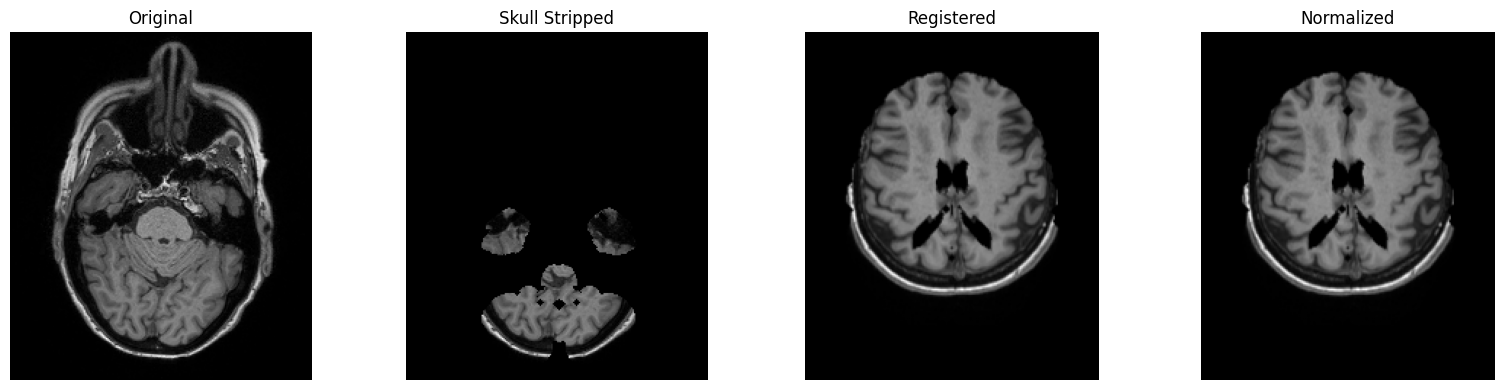

In [4]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

nifti_files = [
    "NIFTI/002_S_0413.nii.gz",
    "output_viz/002_S_0413_skull_stripped.nii.gz",
    "output_viz/002_S_0413_registered.nii.gz",
    "output_viz/002_S_0413_normalized.nii.gz"
]

stage_labels = [
    "Original",
    "Skull Stripped",
    "Registered",
    "Normalized"
]

volumes = [nib.load(f).get_fdata() for f in nifti_files]

fig, axes = plt.subplots(1, len(volumes), figsize=(4*len(volumes), 4))
for i, (data, label) in enumerate(zip(volumes, stage_labels)):
    mid_slice = data.shape[2] // 2  # middle of this volume
    axes[i].imshow(np.rot90(data[:, :, mid_slice]), cmap="gray")
    axes[i].set_title(label)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


## restructuring like follows

dataset_60

 - MCI
    - ALL MCI Patients
 - CN 
    - ALL CN Patients

In [6]:
import os
import pandas as pd
import shutil
from glob import glob

# --- CONFIG ---
csv_path = "adni_4_try_8_14_2025.csv"
nifti_dir = "preprocessing/"
output_root = "Dataset/"
os.makedirs(output_root, exist_ok=True)

# --- Read and clean CSV ---
df = pd.read_csv(csv_path)

# Strip spaces and normalize subject and label
df['Subject'] = df['Subject'].astype(str).str.strip()
df['Group'] = df['Group'].astype(str).str.upper().str.strip()

# Filter only MCI and CN
df = df[df['Group'].isin(['MCI', 'CN'])]

# --- Build lookup dictionary ---
id_to_label = dict(zip(df['Subject'], df['Group']))

# --- Check filenames ---
nii_files = glob(os.path.join(nifti_dir, "*.nii.gz"))
matched_subjects = set()

for nii_file in nii_files:
    basename = os.path.basename(nii_file)
    file_subject_id = basename.replace("_normalized", "").split(".")[0]  # remove "_normalized"

    # Match after removing "_normalized"
    if file_subject_id in id_to_label:
        label = id_to_label[file_subject_id]
        target_dir = os.path.join(output_root, label)
        os.makedirs(target_dir, exist_ok=True)
        shutil.copy(nii_file, os.path.join(target_dir, f"{file_subject_id}.nii.gz"))  # renamed without "_normalized"
        print(f"Moved: {basename} → {label}/ as {file_subject_id}.nii.gz")
        matched_subjects.add(file_subject_id)
    else:
        print(f"No match for: {basename}")

# --- Report unmatched CSV subjects ---
unmatched_ids = set(id_to_label.keys()) - matched_subjects
if unmatched_ids:
    print("These subject IDs were in CSV but not matched in files:")
    for uid in unmatched_ids:
        print(f"  - {uid}")

print("Directory restructuring complete.")


Moved: 002_S_0413_normalized.nii.gz → CN/ as 002_S_0413.nii.gz
Moved: 002_S_10814_normalized.nii.gz → MCI/ as 002_S_10814.nii.gz
Moved: 002_S_1155_normalized.nii.gz → MCI/ as 002_S_1155.nii.gz
Moved: 002_S_1280_normalized.nii.gz → CN/ as 002_S_1280.nii.gz
Moved: 002_S_4213_normalized.nii.gz → CN/ as 002_S_4213.nii.gz
Moved: 002_S_5178_normalized.nii.gz → CN/ as 002_S_5178.nii.gz
Moved: 002_S_6007_normalized.nii.gz → CN/ as 002_S_6007.nii.gz
Moved: 002_S_6053_normalized.nii.gz → CN/ as 002_S_6053.nii.gz
Moved: 002_S_6103_normalized.nii.gz → CN/ as 002_S_6103.nii.gz
Moved: 002_S_6404_normalized.nii.gz → CN/ as 002_S_6404.nii.gz
Moved: 003_S_10042_normalized.nii.gz → CN/ as 003_S_10042.nii.gz
Moved: 003_S_10073_normalized.nii.gz → CN/ as 003_S_10073.nii.gz
Moved: 003_S_10082_normalized.nii.gz → CN/ as 003_S_10082.nii.gz
Moved: 003_S_10158_normalized.nii.gz → CN/ as 003_S_10158.nii.gz
Moved: 003_S_10426_normalized.nii.gz → MCI/ as 003_S_10426.nii.gz
Moved: 003_S_10593_normalized.nii.gz → C